In [1]:
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
import weightedcalcs as wc
import matplotlib.patches as mpatches
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [2]:
with open('../../data/processed/df.pickle', 'rb') as file:
     all_ = pickle.load( file)
with open('../../data/processed/target.pickle', 'rb') as file:
     y = pickle.load(file)
with open('../../data/processed/selected_feat.pickle', 'rb') as file:
     slctd_feat = pickle.load(file)

In [3]:
col_list = slctd_feat.columns
col_list

Index(['imiss_c_2016', 'imiss_f_2016', 'imiss_l_2016', 'imiss_p_2016',
       'imiss_u_2016', 'imiss_x_2016', 'imiss_y_2016'],
      dtype='object')

In [4]:
slctd_feat['weight'] = all_.weight
slctd_feat['target'] = y

In [5]:
weight = slctd_feat['weight']
calc = wc.Calculator('weight')

In [6]:
grouped = slctd_feat.groupby('target')

In [8]:
iss_list = ['immigration', 'terrorism', 'climate change',
        'the budget deficit', 'the size of government', 'racial equality', 'gender equality']
for ind, col in enumerate(col_list):
    freq = calc.distribution(slctd_feat, col).round(3)
    g_freq = calc.distribution(grouped, col).round(3)

    print(iss_list[ind], freq, '\n',
         iss_list[ind], g_freq)

immigration imiss_c_2016
1.0    0.447
2.0    0.359
3.0    0.132
4.0    0.033
8.0    0.029
Name: weight, dtype: float64 
 immigration imiss_c_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.304  0.427  0.200  0.038  0.030
2.0           0.616  0.295  0.058  0.020  0.011
3.0           0.399  0.347  0.143  0.047  0.063
terrorism imiss_f_2016
1.0    0.566
2.0    0.285
3.0    0.087
4.0    0.035
8.0    0.027
Name: weight, dtype: float64 
 terrorism imiss_f_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.410  0.352  0.158  0.051  0.029
2.0           0.775  0.190  0.012  0.006  0.016
3.0           0.464  0.339  0.093  0.060  0.044
climate change imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64 
 climate change imiss_l_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.657  0.

In [9]:
amrcns_list = [.341, .374, 378, .393, .447, .491, .566]
clnt_list = {.585, 0.657, 0.601, 0.175, 0.304, 0.292, 0.410, }

trmp_list = {
    'Gender Equality': 0.124,
    'Climate Change': 0.115,
    'Racial Equality': 0.191,
    'The Size of Government': 0.630,
    'Immigration': .616,
    'The Budget Deficit': .706,
    'Terrorism': 0.775,
}

ValueError: x and y must be the same size

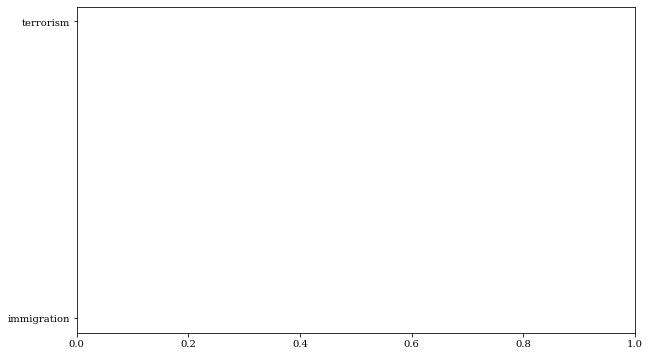

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cat_list = [trmp_list, clnt_list, amrcns_list]
labels = ['All registered voters', '\'16 Clinton Voters', '\'16 Trump Voters']
color = ['#b19cd9', 'cornflowerblue', 'tomato']

for idx, cat in enumerate(cat_list):
    plt.scatter(x=cat, y=iss_list, alpha=0.7, linewidth=2, s=500, label=labels[idx], c=color[idx])

plt.xlim(0,.9)
ax.get_xaxis().set_visible(True)
ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9])
ax.set_xticklabels([0,'',20,'',40,'',60,'',80,''], fontsize=15)
ax.set_xlabel('Percentage rated \'Very Important\'', fontsize=15)
ax.set_yticklabels(labels=list_, fontsize=15)
ax.grid(linestyle='-', linewidth='0.3', color='grey')
ax.tick_params(direction='out', length=0, colors='grey',grid_color='grey', grid_alpha=None, labelcolor='black')
ax.legend(frameon=False, loc='upper right', fontsize=12, bbox_to_anchor=(1.015,1.3), markerscale=.4)

spines = ['top', 'bottom', 'right']

for sp in spines:
    ax.spines[sp].set_visible(False)

plt.savefig('../../reports/figures/bubble_chrt.png')
plt.show()